In [1]:
from google_search import *
from bs4 import BeautifulSoup
import json

In [2]:
with open("./1_0.html", "r") as f:
    html = f.read()

In [3]:
soup = BeautifulSoup(html)

In [4]:
scripts = [x.get_text() for x in soup.find_all("script")]
scripts = [x for x in scripts if x.startswith("(function(){var s='data:image/jpeg;base64")]

In [5]:
script = scripts[3]

In [6]:
def get_real_data_src(script: str) -> dict:
    placeholder_ids = script.split(";var ii=")[1].split(";")[0].replace("'", '"')
    placeholder_ids = json.loads(placeholder_ids)
    real_src = script.split("(function(){var s='")[1].split("';var ii")[0]

    mapping = {id_: real_src for id_ in placeholder_ids}
    return mapping

In [7]:
# query = 'Tribes of Europa'
# query_id = '1'
# params = {
#     'start': 0,
#     'num': 100,
#     'tbm': 'nws',
#     'hl': 'de',
#     'gl': 'DE',
#     # 'cr': 'countryDE',
#     # 'lr': "lang_de"   
# }

# data = get_all_data(query, params, 1)

# # df = df[df["language"] == language]


In [8]:
google_page = GooglePage(soup, 1, 1)

In [9]:
result_soup = google_page.results_containers[0]
google_result = GoogleResult(result_soup)

In [10]:
google_result

image_mapping 96


[{'id': '161607217312',
  'title': 'Nach der 3. Staffel "Dark": So anders sehen die Stammbaume ...',
  'link': 'http://www.filmstarts.de/nachrichten/18531594.html',
  'website': 'filmstarts',
  'description': 'Achtung, Spoiler zu ,,Dark"! Im Finale der deutschen Netflix-Serie werden die bisher bekannten Parallelwelten ausgeloscht und es bleibt nur ...04.07.2020',
  'search_position': '2',
  'query': 'Netflix Dark',
  'query_id': 1,
  'keywords_matched': None,
  'image_id': 'dimg_11',
  'date': '04/07/2020 00:00',
  'date_crawled': datetime.datetime(2021, 3, 18, 12, 56, 13, 218425),
  'image': '\\x3d'},
 {'id': '161607217313',
  'title': "Hustle and Fro: Dear Netflix, don't be afraid of the dark",
  'link': 'https://dailytrojan.com/2021/02/25/hustle-and-fro-dear-netflix-dont-be-afraid-of-the-dark/',
  'website': 'Daily Trojan Online',
  'description': 'Netflix has a long history of failing to cast dark-skinned Black women in their roles. Photo from IMDb. Growing up, representation was a
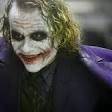
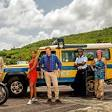
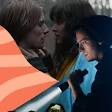
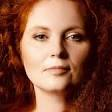
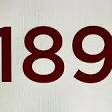
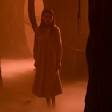
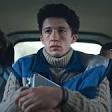
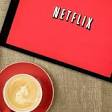
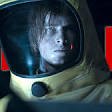
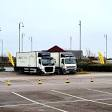
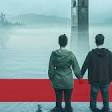
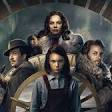
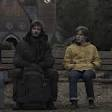
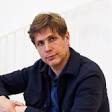
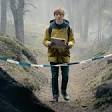
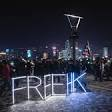
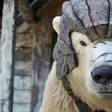
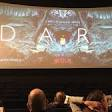
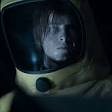
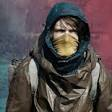
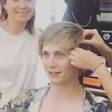
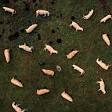
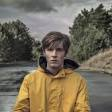
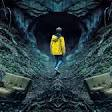
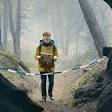
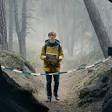
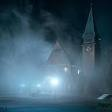
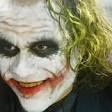
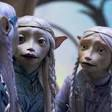
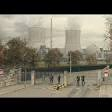

In [11]:
list(google_page.results())